In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
import plotly.express as px
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.linear_model import LinearRegression


# <span style="color:red"> * Read Data<span>

In [2]:
Data = pd.read_csv('stock_market_data.csv')
AMZN = Data[Data['Symbol'] == 'AMZN']
FB = Data[Data['Symbol'] == 'FB']
TSLA = Data[Data['Symbol'] == 'TSLA']
GOOGL = Data[Data['Symbol'] == 'GOOGL']
AAPL = Data[Data['Symbol'] == 'AAPL']

In [3]:
### USER DATABASE ###
user_shares = {}
curr_price = {}
latest_price = {}
second_to_latest = {}


# <span style="color:red"> * Shares settings<span>

In [4]:
tlist = [AMZN, FB, TSLA, GOOGL, AAPL]
tickers = ['AMZN', 'FB', 'TSLA', 'GOOGL', 'AAPL']
tp = {'AMZN' : list(AMZN['Open'])[-1], 'FB' : list(FB['Open'])[-1], 'TSLA' : list(TSLA['Open'])[-1], 'GOOGL': list(GOOGL['Open'])[-1], 'AAPL': list(AAPL['Open'])[-1]}

<h3> Welcome to NYSE Stock market, please sign up to continue: </h3>

<h6> please enter your first name and last name: </h6>

In [6]:
name = input()

<h6>please enter your ID number:</h6>

In [14]:
ID = input()

 123


<h6>please enter you birth date in this format(dd/mm/yyyy):</h6>

In [16]:
BD = input()

<h6>please enter your balance in US$:</h6>

In [17]:
Balance = int(input())

 2500


<h3>Thanks for your registration, now you have access to trade in Stock market</h3>


# <span style="color:red"> * Stock market portfolio<span>

## To buy shares:

In [18]:
print(f'Your Balance is : {Balance}$')
pick = int(input('''to buy shares, please enter the ticker's number:
1- AMZN
2- FB
3- TSLA
4- GOOGL
5- AAPL
'''))

for i, j in enumerate(tlist[pick-1]['Date']):
    if j == '2020-03-02':
        curr_price[tickers[pick-1]] = list(tlist[pick-1]['Open'])[i] 
        break

for i, j in enumerate(tickers):
    latest_price[j] = list(tlist[i]['Open'])[-1]
    second_to_latest[j] = list(tlist[i]['Open'])[-2]
    
to_buy = int(input(f'{tickers[pick-1]} price is {curr_price[tickers[pick-1]]}$ per share, how many shares do you want to buy?'))

if(to_buy * curr_price[tickers[pick-1]] > Balance):
    print("Insufficient Balance")
else:
    Balance -= to_buy * curr_price[tickers[pick-1]]
    
    if tickers[pick-1] in user_shares.keys():
        user_shares[tickers[pick-1]] += to_buy
    else:
        user_shares[tickers[pick-1]] = to_buy
    
    print(f'You have successfully bought {to_buy} share from {tickers[pick-1]}, your new Balance is: {Balance}$')
        

Your Balance is : 2500$


to buy shares, please enter the ticker's number:
1- AMZN
2- FB
3- TSLA
4- GOOGL
5- AAPL
 1
AMZN price is 1906.489990234375$ per share, how many shares do you want to buy? 1


You have successfully bought 1 share from AMZN, your new Balance is: 593.510009765625$


## To sell shares:

In [13]:
d = {'Shares': list(user_shares.keys()), 'Quantities': list(user_shares.values())}
df2 = pd.DataFrame(data=d)
ins = list(df2['Quantities'])
df2 = df2.set_index('Quantities')

if 0 in ins:
    df2 = df2.drop(0)
df2 = df2.reset_index()

print(f'Your Shares are listed Below:')
if len(df2):
    print(df2.to_markdown())

pick = int(input('''to sell shares, please enter the ticker's number:
1- AMZN
2- FB
3- TSLA
4- GOOGL
5- AAPL
'''))

if tickers[pick-1] in user_shares.keys() and user_shares[tickers[pick-1]] != 0:   
    to_sell = int(input(f'{tickers[pick-1]} price is {latest_price[tickers[pick-1]]} per share and you have {user_shares[tickers[pick-1]]} shares, how many shares of yours do you want to sell?'))

    if(to_sell > int(user_shares[tickers[pick-1]])):
        print("Insufficient Shares!")
    else:
        user_shares[tickers[pick-1]] -= to_sell
        Balance += to_sell * latest_price[tickers[pick-1]]
        print(f'You have successfully sold {to_sell} shares of {tickers[pick-1]}, your new Balance is: {Balance}')
else:
    print(f'You do not have any {tickers[pick-1]} shares in your portfolio!')

Your Shares are listed Below:
to sell shares, please enter the ticker's number:
1- AMZN
2- FB
3- TSLA
4- GOOGL
5- AAPL
1
You do not have any AMZN shares in your portfolio!


## To check charts:

To check the charts, please enter the ticker's number:
1- AMZN
2- FB
3- TSLA
4- GOOGL
5- AAPL
 1


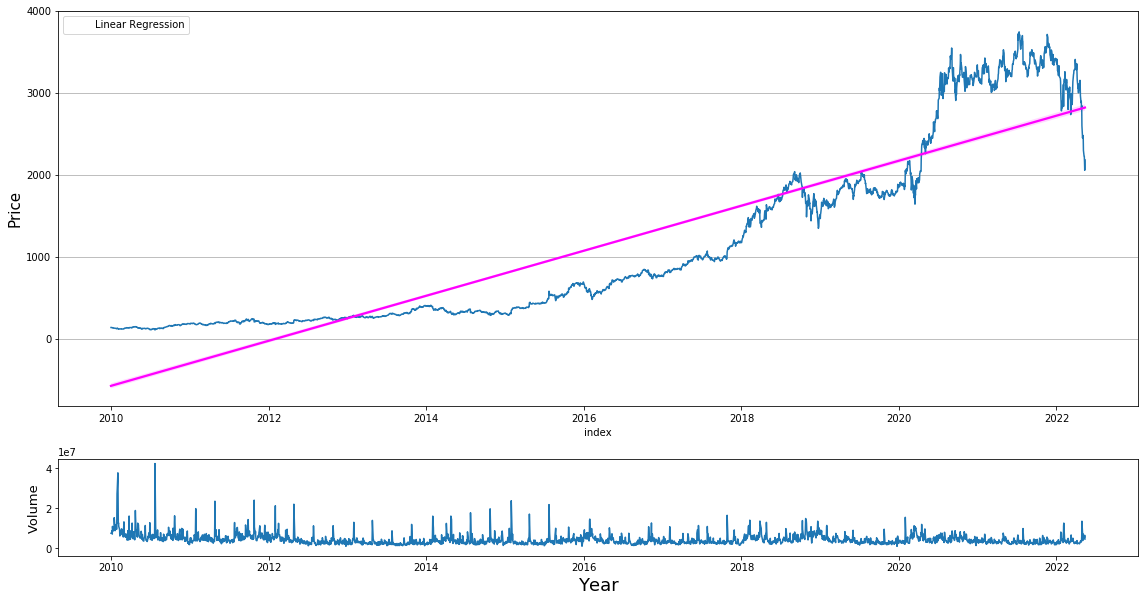

In [42]:
num = int(input('''To check the charts, please enter the ticker's number:
1- AMZN
2- FB
3- TSLA
4- GOOGL
5- AAPL
'''))

if num in range(1,6):
    df = pd.DataFrame()
    df['Open'] = tlist[num-1]['Open']
    df.index = [datetime.strptime(x, "%Y-%m-%d") for x in list(tlist[num-1]['Date'])]
    df.index = df.index.map(pd.Timestamp.toordinal)
    data=df.loc[:].reset_index()    
         
    xax = list(tlist[num-1]['Date'])
    yax = list(tlist[num-1]['Open'])
    vol = list(tlist[num-1]['Volume'])
    xs = [datetime.strptime(x, "%Y-%m-%d") for x in xax]
    
    plt.figure(figsize=(16, 10))
    plt.subplot2grid((5, 4), (0, 0), rowspan=3, colspan=4)
    plt.plot(xs, yax)
    sns.regplot(data=data, x='index', y='Open',color='magenta', scatter_kws={"color" : "white"}, label='Linear Regression', scatter=True)
    plt.grid(axis='y')
    plt.ylabel('Price', fontsize=15)
    plt.legend()
    plt.subplot2grid((5,4), (3,0), rowspan=1, colspan=4)
    plt.plot(xs, vol)
    sns.regplot(data=data, x='index', y='Open',color='white', scatter_kws={"color" : "white"}, label='Linear Model', scatter=True)
    plt.ylabel('Volume', fontsize = 13)
    plt.xlabel('Year', fontsize = 18)
    plt.tight_layout()
    plt.show()

else:
    print("Wrong ticker number!")

## To check user shares list:

In [146]:
profit = pd.DataFrame(user_shares.items())

profit.columns = ['Ticker', 'Quantity']
profit['Profit percentage'] = [(latest_price[i] - curr_price[i]) * 100 /  curr_price[i]  for i in user_shares.keys()]
profit['Profit in US$'] = [latest_price[i] - curr_price[i]  for i in user_shares.keys()] 
profit['Value in US$'] = [tp[i] * user_shares[i] for i in user_shares.keys()]
profit = profit[profit['Quantity'] != 0]

print(profit.to_markdown())

|    | Ticker   |   Quantity |   Profit percentage |   Profit in US$ |   Value in $ |
|---:|:---------|-----------:|--------------------:|----------------:|-------------:|
|  0 | AMZN     |          2 |             14.4186 |          274.89 |      4362.76 |


## To check market shares list:

In [150]:
ratio = pd.DataFrame()

ratio['Ticker'] = tickers
ratio['24h change in %'] = [(latest_price[i] * 100 / second_to_latest[i]) - 100 for i in tickers]
ratio['Value in US$'] = [tp[i] for i in tickers]

print(ratio.to_markdown())

|    | Ticker   |   24h change in % |   Value in US$ |
|---:|:---------|------------------:|---------------:|
|  0 | AMZN     |           6.14987 |        2181.38 |
|  1 | FB       |           2.95093 |         192.58 |
|  2 | TSLA     |          10.3395  |         773.48 |
|  3 | GOOGL    |           2.83315 |        2290.66 |
|  4 | AAPL     |           1.27477 |         144.59 |
